In [1]:
import read_benchmarks as rb

# Data files

In [2]:
directory = "../../results/"

# CPU-only results before adding nograd
filepath_grad_1k = directory + "icelake/output_1000/slurm-33506613.out"
filepath_grad_10k = directory + "icelake/output_10000/slurm-33391884.out"

# CPU-only results after adding nograd, but before fixing tensor deletion 
filepath_nograd_1k = directory + "icelake_nograd/output_1000/slurm-34004158.out"
filepath_nograd_10k = directory + "icelake_nograd/output_10000/slurm-34004805.out"

# CPU-only results after adding nograd and fixing tensor deletion
filepath_nograd_fix_1k = directory + "icelake_nograd/output_1000_fix/slurm-34050567.out"
filepath_nograd_fix_10k = directory + "icelake_nograd/output_10000_fix/slurm-34051232.out"

# GPU results before adding nograd
filepath_grad_gpu_10k = directory + "ampere/output_10000/slurm-33396715.out"
filepath_grad_gpu_100k = directory + "ampere/output_100000/slurm-33397018.out"

# GPU results after adding nograd, but before fixing tensor deletion 
filepath_nograd_gpu_10k = directory + "ampere_nograd/output_10000/slurm-34004398.out"
filepath_nograd_gpu_100k = directory + "ampere_nograd/output_100000/slurm-34004705.out"

# GPU results after adding nograd and fixing tensor deletion
filepath_nograd_fix_gpu_10k = directory + "ampere_nograd/output_10000_fix/slurm-34050397.out"
filepath_nograd_fix_gpu_100k = directory + "ampere_nograd/output_100000_fix/slurm-34051212.out"

In [3]:
cpu_tests = [
    "cgdrag_forpy",
    "cgdrag_torch_implicit",
    "cgdrag_torch_explicit",
    "resnet_forpy",
    "resnet_torch",
]

cpu_n_threads = ["1", "4", "8"]
cpu_labels = []

for threads in cpu_n_threads:
    for test in cpu_tests:
        cpu_labels.append(f"{test}_{threads}")


gpu_tests = [
    "cgdrag_forpy_gpu",
    "cgdrag_torch_explicit_gpu",
    "cgdrag_torch_implicit_gpu",
    "resnet_forpy_gpu",
    "resnet_torch_gpu",
]

gpu_n_threads = ["1", "8"]
gpu_labels = []

for threads in gpu_n_threads:
    for test in gpu_tests:
        gpu_labels.append(f"{test}_{threads}")

# CPU only comparisons between FTorch and Forpy

In [4]:
benchmarks_nograd_fix_1k = rb.read_slurm_walltime(filepath_nograd_fix_1k, cpu_labels)
benchmarks_nograd_fix_10k = rb.read_slurm_walltime(filepath_nograd_fix_10k, cpu_labels)

Reading: ../../results/icelake_nograd/output_1000_fix/slurm-34050567.out
Reading: ../../results/icelake_nograd/output_10000_fix/slurm-34051232.out


In [5]:
benchmarks_nograd_fix = {}

for key, value in benchmarks_nograd_fix_1k.items():
    benchmarks_nograd_fix[key + "_1k"] = value / 1000

for key, value in benchmarks_nograd_fix_10k.items():
    benchmarks_nograd_fix[key + "_10k"] = value / 10000

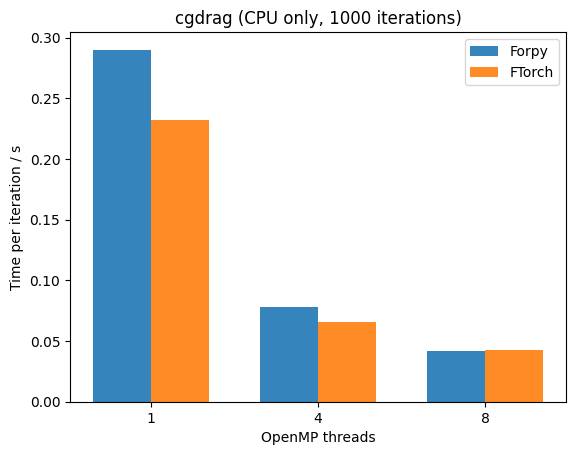

In [6]:
filtered_labels = [
    label for label in benchmarks_nograd_fix.keys() if (
        "cgdrag" in label and "10k" not in label and ("forpy" in label or "torch_implicit" in label)
    )
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 1000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

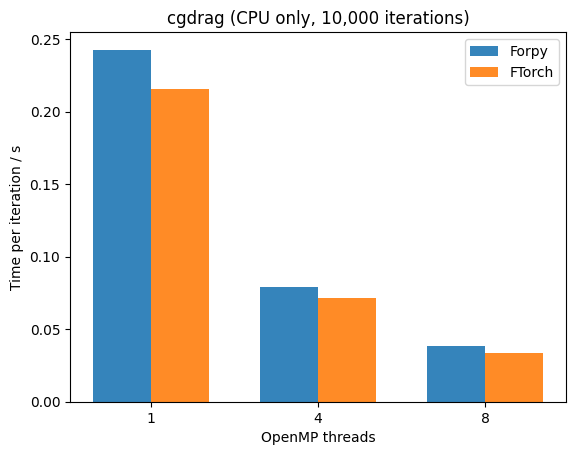

In [7]:
filtered_labels = [
    label for label in benchmarks_nograd_fix.keys() if (
        "cgdrag" in label and "10k" in label and ("forpy" in label or "torch_implicit" in label)
    )
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

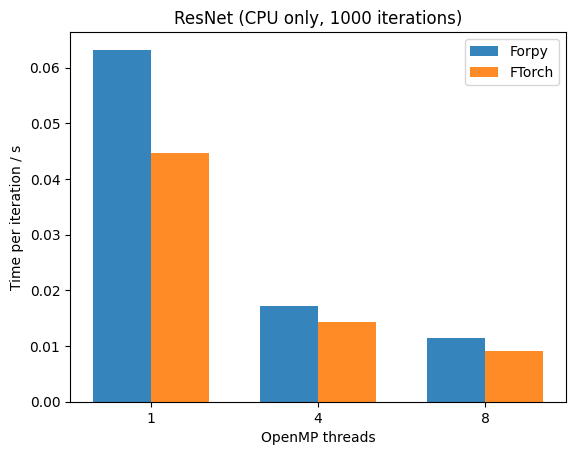

In [8]:
filtered_labels = [
    label for label in benchmarks_nograd_fix.keys() if ("resnet" in label and "10k" not in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 1000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

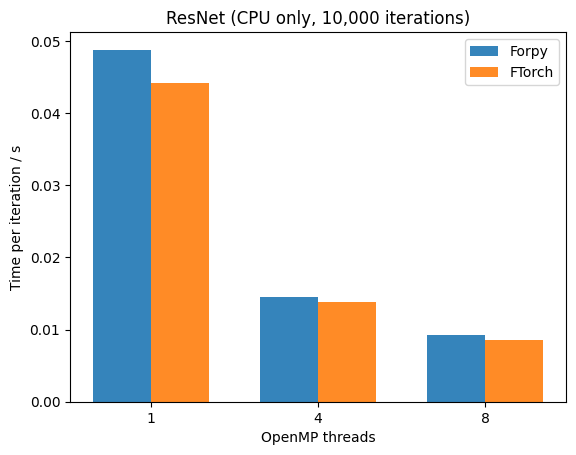

In [9]:
filtered_labels = [
    label for label in benchmarks_nograd_fix.keys() if ("resnet" in label and "10k" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",
    ylim=0.,

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

# GPU comparisons between FTorch and Forpy

In [10]:
benchmarks_nograd_fix_gpu_10k = rb.read_slurm_walltime(filepath_nograd_fix_gpu_10k, gpu_labels)
benchmarks_nograd_fix_gpu_100k = rb.read_slurm_walltime(filepath_nograd_fix_gpu_100k, gpu_labels)

Reading: ../../results/ampere_nograd/output_10000_fix/slurm-34050397.out
Reading: ../../results/ampere_nograd/output_100000_fix/slurm-34051212.out


In [11]:
benchmarks_nograd_fix_gpu = {}

for key, value in benchmarks_nograd_fix_gpu_10k.items():
    benchmarks_nograd_fix_gpu[key + "_10k"] = value / 10000

for key, value in benchmarks_nograd_fix_gpu_100k.items():
    benchmarks_nograd_fix_gpu[key + "_100k"] = value / 100000

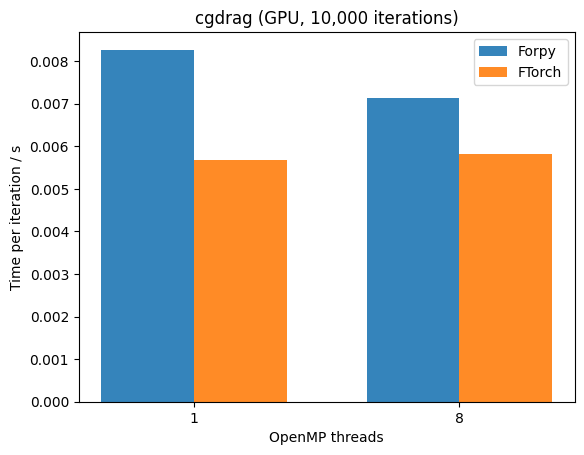

In [12]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu.keys() if (
        ("cgdrag_forpy" in label or "cgdrag_torch_implicit" in label) and "100k" not in label
    )
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

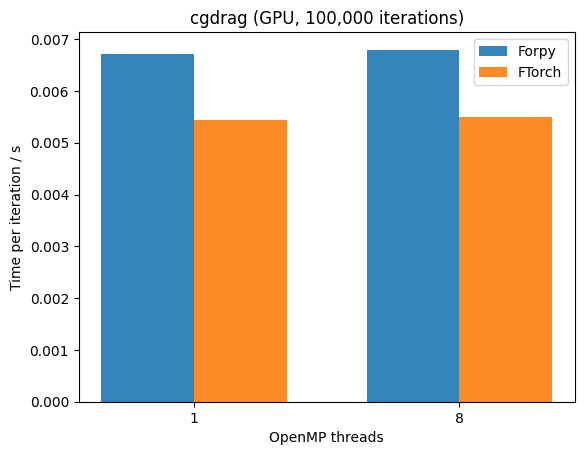

In [13]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu.keys() if (
        ("cgdrag_forpy" in label or "cgdrag_torch_implicit" in label) and "100k" in label
    )
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 100,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

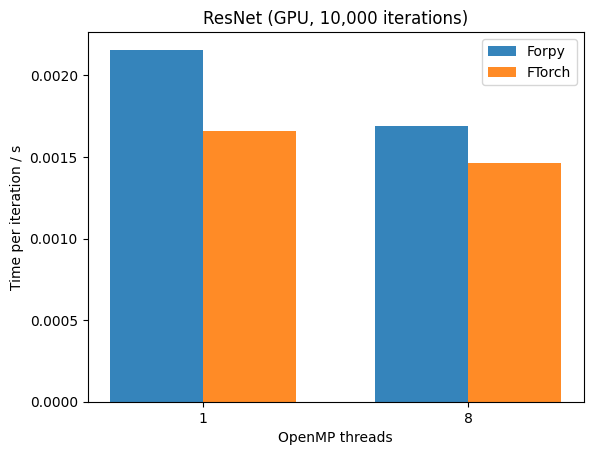

In [14]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu.keys() if ("resnet" in label and "100k" not in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

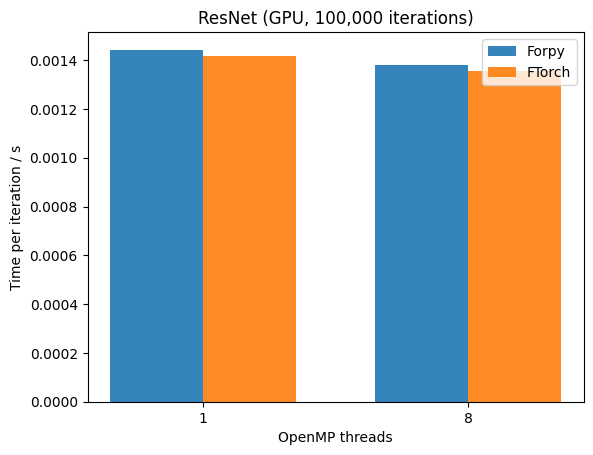

In [15]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu.keys() if ("resnet" in label and "100k" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 100,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

# Comparisons CPU and GPU for FTorch and Forpy

In [16]:
benchmarks_nograd_fix_gpu_cpu = {}

for key, value in benchmarks_nograd_fix.items():
    if ("_8" in key and "10k" in key):
        benchmarks_nograd_fix_gpu_cpu[key] = value
for key, value in benchmarks_nograd_fix_gpu.items():
    if ("_8" in key and "100k" not in key):
        benchmarks_nograd_fix_gpu_cpu[key] = value

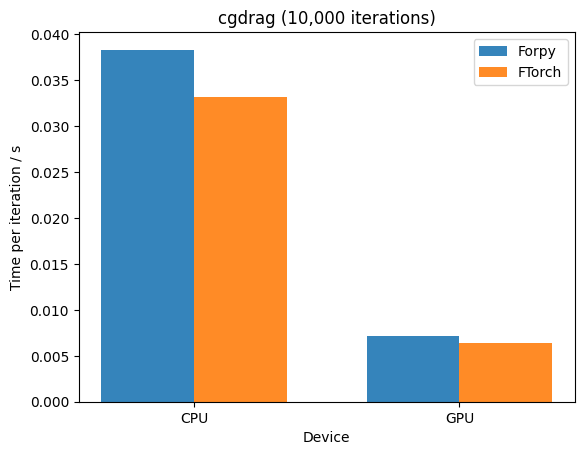

In [17]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu_cpu.keys() if (
        "cgdrag_torch_explicit" in label or "cgdrag_forpy" in label
    )
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu_cpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["CPU", "GPU"],
    xlabel="Device",
    # yscale="log",
    # ylim=(0.005, 0.1),

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

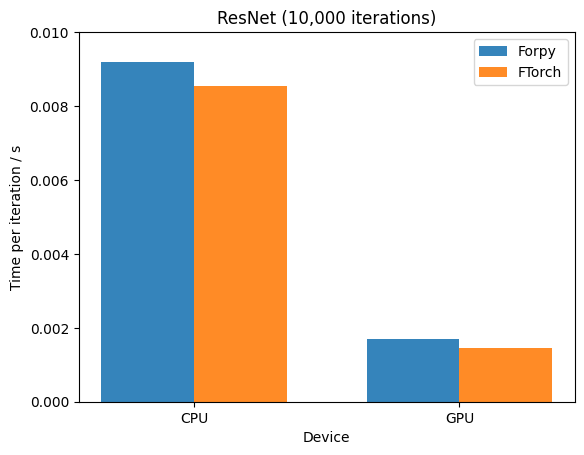

In [18]:
filtered_labels = [
    label for label in benchmarks_nograd_fix_gpu_cpu.keys() if ("resnet" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nograd_fix_gpu_cpu,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (10,000 iterations)",

    legend_labels={"forpy": "Forpy", "torch": "FTorch"},
    xticklabels=["CPU", "GPU"],
    xlabel="Device",
    # yscale="log",
    ylim=(0., 0.01),

    # legend_labels={"_1_": "1", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

# Comparing FTorch with and without nograd

In [19]:
benchmarks_grad_1k = rb.read_slurm_walltime(filepath_grad_1k, cpu_labels)
benchmarks_nograd_1k = rb.read_slurm_walltime(filepath_nograd_1k, cpu_labels)

benchmarks_grad_10k = rb.read_slurm_walltime(filepath_grad_10k, cpu_labels)
benchmarks_nograd_10k = rb.read_slurm_walltime(filepath_nograd_10k, cpu_labels)

Reading: ../../results/icelake/output_1000/slurm-33506613.out
Reading: ../../results/icelake_nograd/output_1000/slurm-34004158.out
Reading: ../../results/icelake/output_10000/slurm-33391884.out
Reading: ../../results/icelake_nograd/output_10000/slurm-34004805.out


In [20]:
benchmarks_grad_nograd_1k = {}
benchmarks_grad_nograd_10k = {}

for key, value in benchmarks_grad_1k.items():
    benchmarks_grad_nograd_1k[key + "_grad"] = value / 1000

for key, value in benchmarks_nograd_1k.items():
    benchmarks_grad_nograd_1k[key + "_nograd"] = value / 1000

for key, value in benchmarks_grad_10k.items():
    benchmarks_grad_nograd_10k[key + "_grad"] = value / 10000

for key, value in benchmarks_nograd_10k.items():
    benchmarks_grad_nograd_10k[key + "_nograd"] = value / 10000

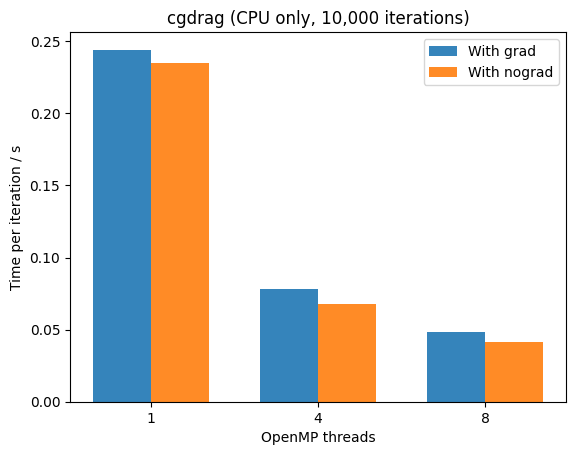

In [21]:
filtered_labels = [
    label for label in benchmarks_grad_nograd_10k.keys() if ("cgdrag" in label and "torch_implicit" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad_nograd_10k,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU only, 10,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

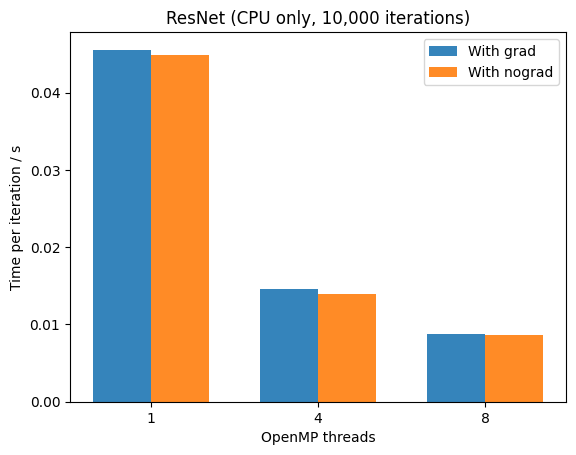

In [22]:
filtered_labels = [
    label for label in benchmarks_grad_nograd_10k.keys() if ("resnet" in label and "torch" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad_nograd_10k,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (CPU only, 10,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [23]:
benchmarks_grad_gpu_10k = rb.read_slurm_walltime(filepath_grad_gpu_10k, gpu_labels)
benchmarks_nograd_gpu_10k = rb.read_slurm_walltime(filepath_nograd_gpu_10k, gpu_labels)

benchmarks_grad_gpu_100k = rb.read_slurm_walltime(filepath_grad_gpu_100k, gpu_labels)
benchmarks_nograd_gpu_100k = rb.read_slurm_walltime(filepath_nograd_gpu_100k, gpu_labels)

Reading: ../../results/ampere/output_10000/slurm-33396715.out
Reading: ../../results/ampere_nograd/output_10000/slurm-34004398.out
Reading: ../../results/ampere/output_100000/slurm-33397018.out
Reading: ../../results/ampere_nograd/output_100000/slurm-34004705.out


In [24]:
benchmarks_grad_nograd_gpu_10k = {}
benchmarks_grad_nograd_gpu_100k = {}

for key, value in benchmarks_grad_gpu_10k.items():
    benchmarks_grad_nograd_gpu_10k[key + "_grad"] = value / 10000

for key, value in benchmarks_nograd_gpu_10k.items():
    benchmarks_grad_nograd_gpu_10k[key + "_nograd"] = value / 10000

for key, value in benchmarks_grad_gpu_100k.items():
    benchmarks_grad_nograd_gpu_100k[key + "_grad"] = value / 100000

for key, value in benchmarks_nograd_gpu_100k.items():
    benchmarks_grad_nograd_gpu_100k[key + "_nograd"] = value / 100000

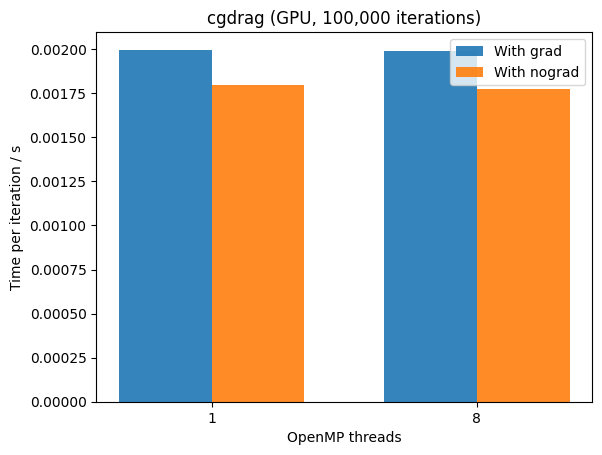

In [25]:
filtered_labels = [
    label for label in benchmarks_grad_nograd_gpu_100k.keys() if ("cgdrag" in label and "torch_implicit" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad_nograd_gpu_100k,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (GPU, 100,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

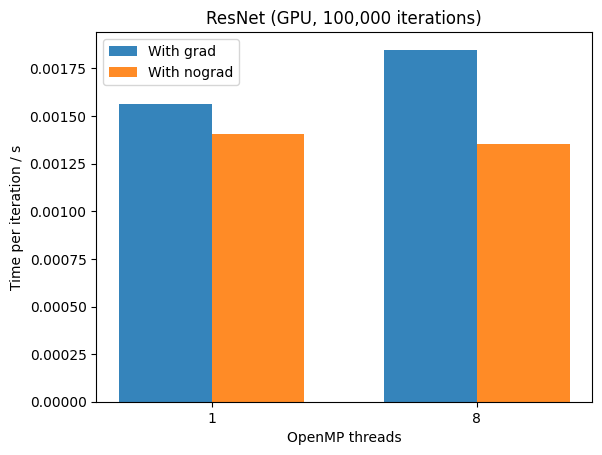

In [26]:
filtered_labels = [
    label for label in benchmarks_grad_nograd_gpu_100k.keys() if ("resnet" in label and "torch" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_grad_nograd_gpu_100k,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="ResNet (GPU, 100,000 iterations)",

    legend_labels={"_grad": "With grad", "_nograd": "With nograd"},
    xticklabels=gpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

# Comparing FTorch before and after fixing tensor deletion

In [27]:
benchmarks_nograd_1k = rb.read_slurm_walltime(filepath_nograd_1k, cpu_labels)
benchmarks_nograd_fix_1k = rb.read_slurm_walltime(filepath_nograd_fix_1k, cpu_labels)

benchmarks_nograd_10k = rb.read_slurm_walltime(filepath_nograd_10k, cpu_labels)
benchmarks_nograd_fix_10k = rb.read_slurm_walltime(filepath_nograd_fix_10k, cpu_labels)

Reading: ../../results/icelake_nograd/output_1000/slurm-34004158.out
Reading: ../../results/icelake_nograd/output_1000_fix/slurm-34050567.out
Reading: ../../results/icelake_nograd/output_10000/slurm-34004805.out
Reading: ../../results/icelake_nograd/output_10000_fix/slurm-34051232.out


In [28]:
benchmarks_nofix_fix_1k = {}
benchmarks_nofix_fix_10k = {}

for key, value in benchmarks_nograd_1k.items():
    benchmarks_nofix_fix_1k[key + "_nofix"] = value / 1000

for key, value in benchmarks_nograd_fix_1k.items():
    benchmarks_nofix_fix_1k[key + "_fix"] = value / 1000

for key, value in benchmarks_nograd_10k.items():
    benchmarks_nofix_fix_10k[key + "_nofix"] = value / 10000

for key, value in benchmarks_nograd_fix_10k.items():
    benchmarks_nofix_fix_10k[key + "_fix"] = value / 10000

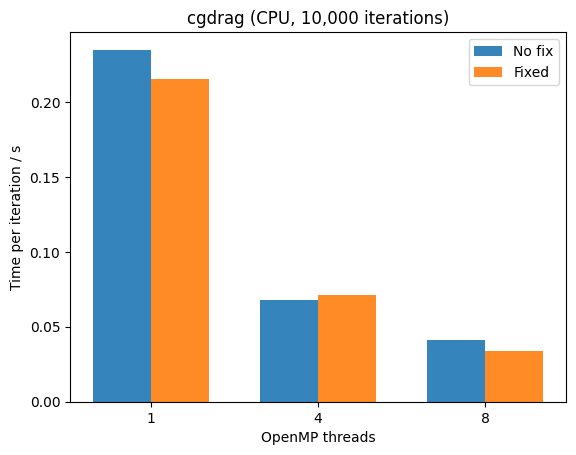

In [29]:
filtered_labels = [
    label for label in benchmarks_nofix_fix_10k.keys() if ("cgdrag" in label and "torch_implicit" in label)
]
rb.plot_walltimes(
    benchmarks=benchmarks_nofix_fix_10k,
    labels=filtered_labels,
    ylabel="Time per iteration / s",
    title="cgdrag (CPU, 10,000 iterations)",

    legend_labels={"_nofix": "No fix", "_fix": "Fixed"},
    xticklabels=cpu_n_threads,
    xlabel="OpenMP threads",

    # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
    # xticklabels=["Forpy", "FTorch"],
    # xlabel="PyTorch interface",

    bar_width=0.35,
)

In [30]:
benchmarks_nograd_gpu_10k = rb.read_slurm_walltime(filepath_nograd_gpu_10k, gpu_labels)
benchmarks_nograd_fix_gpu_10k = rb.read_slurm_walltime(filepath_nograd_fix_gpu_10k, gpu_labels)

benchmarks_nograd_gpu_100k = rb.read_slurm_walltime(filepath_nograd_gpu_100k, gpu_labels)
benchmarks_nograd_fix_gpu_100k = rb.read_slurm_walltime(filepath_nograd_fix_gpu_100k, gpu_labels)

Reading: ../../results/ampere_nograd/output_10000/slurm-34004398.out
Reading: ../../results/ampere_nograd/output_10000_fix/slurm-34050397.out
Reading: ../../results/ampere_nograd/output_100000/slurm-34004705.out
Reading: ../../results/ampere_nograd/output_100000_fix/slurm-34051212.out


In [31]:
benchmarks_nofix_fix_gpu_10k = {}
benchmarks_nofix_fix_gpu_100k = {}

for key, value in benchmarks_nograd_gpu_10k.items():
    benchmarks_nofix_fix_gpu_10k[key + "_nofix"] = value / 10000

for key, value in benchmarks_nograd_fix_gpu_10k.items():
    benchmarks_nofix_fix_gpu_10k[key + "_fix"] = value / 10000

for key, value in benchmarks_nograd_gpu_100k.items():
    benchmarks_nofix_fix_gpu_100k[key + "_nofix"] = value / 100000

for key, value in benchmarks_nograd_fix_gpu_100k.items():
    benchmarks_nofix_fix_gpu_100k[key + "_fix"] = value / 100000

In [32]:
# Didn't work so nofix cut short!

# filtered_labels = [
#     label for label in benchmarks_nofix_fix_gpu_100k.keys() if ("cgdrag" in label and "torch_implicit" in label)
# ]
# rb.plot_walltimes(
#     benchmarks=benchmarks_nofix_fix_gpu_100k,
#     labels=filtered_labels,
#     ylabel="Time per iteration / s",
#     title="cgdrag (GPU, 100,000 iterations)",

#     legend_labels={"_nofix": "No fix", "_fix": "Fixed"},
#     xticklabels=gpu_n_threads,
#     xlabel="OpenMP threads",

#     # legend_labels={"_1_": "1", "_4_": "4", "_8_": "8"},
#     # xticklabels=["Forpy", "FTorch"],
#     # xlabel="PyTorch interface",

#     bar_width=0.35,
# )

# Old plots

In [ ]:
for thread in n_threads:
    thread = str(thread)
    filtered_labels = [
        label for label in benchmarks_gpu.keys() if ("gpu" in label and "resnet_torch" in label and thread in label)
    ]
    rb.plot_walltimes(benchmarks_gpu, filtered_labels)

In [ ]:
directory = "../build/"
files = [
    "cgdrag_forpy_1.out",
    "cgdrag_torch_1_explicit.out",
    "cgdrag_torch_1_implicit.out",
]

In [ ]:
# Labels can be skipped, but those present must be in order of output "check iteration [label]"
iteration_labels = [
    "inference",
    "create tensors",
    "delete tensors",
    "allocate arrays",
    "deallocate arrays",
    "full loop",
]

In [ ]:
dataframes = {}

for file in files:
    dataframes[file] = rb.read_iteration_data(directory, file, iteration_labels)

In [ ]:
dataframes['cgdrag_forpy_1.out']

In [ ]:
rb.plot_df(dataframes['cgdrag_forpy_1.out'], iteration_labels)

In [ ]:
summary_data = {}
summary_labels = [
    "full loop",
    "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    "forward pass",
    "Overall mean",
]

# Create nested dictionary: summary_data[file][label][mean, min, max, stddev]
for file in files:
    summary_data[file] = rb.read_summary_data(directory, file, summary_labels)

In [ ]:
summary_labels = [
    # "full loop",
    # "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    # "forward pass",
    # "Overall mean",
]

# Plot subset of data with error bars
rb.plot_summary_with_stddev(summary_data, summary_labels)

In [ ]:
summary_labels = [
    "full loop",
    "module creation",
    # "module deletion",
    # "array allocation",
    # "array deallocation",
    # "tensor creation",
    # "tensor deletion",
    "forward pass",
    "Overall mean",
]

labels = summary_labels 

rb.plot_summary_with_stddev(summary_data, labels)

In [ ]:
summary_labels = [
    "full loop",
    "module creation",
    "module deletion",
    "array allocation",
    "array deallocation",
    "tensor creation",
    "tensor deletion",
    "forward pass",
    "Overall mean",
]

rb.plot_summary_means(summary_data, summary_labels)